Explanation: 
This code generates a Log(P-H) diagram for the R410a vapor compression refrigeration cycle. It also calculates the enthalpy in all four stages, and the condenser and evaporator pressure. 

Evaporator pressure (Stage 1): 7.01 bar
Condenser pressure (Stage 2): 31.42 bar
Stage 1 enthaply: 420.12 [kJ/kg]
Stage 2 enthaply: 472.12 [kJ/kg]
Stage 3 enthaply: 287.97 [kJ/kg]
Stage 4 enthaply: 287.97 [kJ/kg]


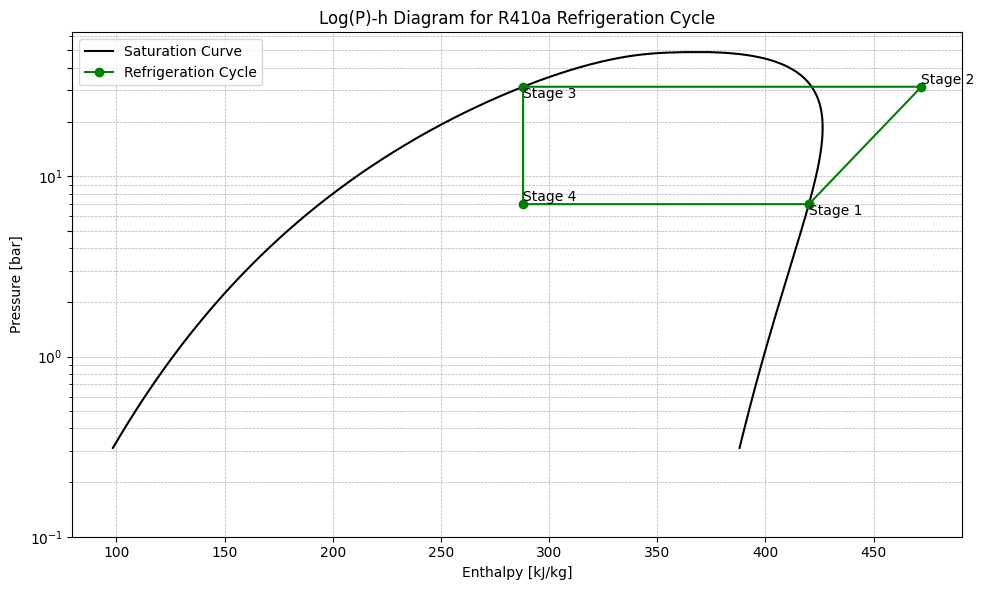

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI

# Data
T_wanted = 273.15 + 1  # [K]
T_ambient = 273.15 + 46  # [K]
refrigerant = 'R410A'
T_evap = T_wanted - 5  # [K]
T_cond = T_ambient + 5  # [K]
n_is = 0.8  # Isentropic efficiency

# Stage 1 
P_evap = PropsSI('P', 'T', T_evap, 'Q', 1, refrigerant)
h1 = PropsSI('H', 'T', T_evap, 'Q', 1, refrigerant)
s1 = PropsSI('S', 'T', T_evap, 'Q', 1, refrigerant)

# Stage 2 
P_cond = PropsSI('P', 'T', T_cond, 'Q', 0, refrigerant)
h2s = PropsSI('H', 'P', P_cond, 'S', s1, refrigerant)
h2 = h1 + (h2s - h1) / n_is  # Actual enthalpy with isentropic efficiency

# Stage 3 
h3 = PropsSI('H', 'T', T_cond, 'Q', 0, refrigerant)

# Stage 4
h4 = h3  # Isenthalpic expansion


#%% Output
print(f"Evaporator pressure (Stage 1): {P_evap / 1e5:.2f} bar")
print(f"Condenser pressure (Stage 2): {P_cond / 1e5:.2f} bar")
print(f"Stage 1 enthaply: {h1/1000:.2f} [kJ/kg]")
print(f"Stage 2 enthaply: {h2/1000:.2f} [kJ/kg]")
print(f"Stage 3 enthaply: {h3/1000:.2f} [kJ/kg]")
print(f"Stage 4 enthaply: {h4/1000:.2f} [kJ/kg]")
#print(f"Specific compressor work: {w_compressor / 1e3:.2f} kJ/kg")
#print(f"Specific cooling capacity: {q_evap / 1e3:.2f} kJ/kg")
#print(f"COP: {COP:.2f}")
#print(f"Compressor work (W): {W / 1000:.2f} kW")


#%% Saturation curve
T_min = PropsSI('Tmin', refrigerant)
T_crit = PropsSI('Tcrit', refrigerant)
T_range = np.linspace(T_min + 1, T_crit - 0.1, 500)

h_liq, h_vap = [], []
P_sat = []

for T in T_range:
    try:
        h_l = PropsSI('H', 'T', T, 'Q', 0, refrigerant)
        h_v = PropsSI('H', 'T', T, 'Q', 1, refrigerant)
        P = PropsSI('P', 'T', T, 'Q', 0, refrigerant)
        h_liq.append(h_l / 1000)  # kJ/kg
        h_vap.append(h_v / 1000)
        P_sat.append(P / 1e5)  # bar
    except:
        continue


h_curve = h_liq + h_vap[::-1]
P_curve= P_sat + P_sat[::-1]

#%% Enthalpies in kJ/kg for plotting
h1_kJ = h1 / 1000
h2_kJ = h2 / 1000
h3_kJ = h3 / 1000
h4_kJ = h4 / 1000

#Pressure in bar for plottinig
P_evap_bar = P_evap / 1e5
P_cond_bar = P_cond / 1e5


plt.figure(figsize=(6, 4), dpi=300)


plt.plot(h_curve, P_curve, 'k-', linewidth=1.5, label='Saturation Curve')

# Refrigeration cycle
h_cycle = [h1_kJ, h2_kJ, h3_kJ, h4_kJ, h1_kJ]
p_cycle = [P_evap_bar, P_cond_bar, P_cond_bar, P_evap_bar, P_evap_bar]
plt.plot(h_cycle, p_cycle, 'g-o', label='Refrigeration Cycle')

# Stages
plt.text(h1_kJ, P_evap_bar, 'Stage 1', verticalalignment='top')
plt.text(h2_kJ, P_cond_bar, 'Stage 2', verticalalignment='bottom')
plt.text(h3_kJ, P_cond_bar, 'Stage 3', verticalalignment='top')
plt.text(h4_kJ, P_evap_bar, 'Stage 4', verticalalignment='bottom')

# Axes and scale
plt.xlabel('Enthalpy [kJ/kg]')
plt.ylabel('Pressure [bar]')
plt.title('Log(P)-h Diagram for R410a Refrigeration Cycle')
plt.yscale('log')
plt.yticks([0.1, 1, 2, 5, 10, 20, 30, 40, 50])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()
